In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 속성 및 기술통계량 확인

In [62]:
df = pd.read_csv("/home/piai/강의자료/Datahandling/BigData기초/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.shape

(891, 12)

In [65]:
df.describe().round(3) #기술 통계량 확인.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.759,0.523,0.382,32.204
std,257.354,0.487,0.836,13.003,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,22.000,0.000,0.000,7.910
50%,446.000,0.000,3.000,30.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,35.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


Pclass : 승객 등급. 1,2,3등석
Name, Sex, Age : 이름, 성별, 나이
SibSp : 함께 탑승한 형제, 배우자의 수
Parch : 함께 탑승한 자녀, 부모의 수
Ticket : 티켓 아이디
Fare : 티켓 요금(파운드)
Cabin : 객실 번호
Embarked : 승객이 탑승한 곳. C,Q,S

# 결측지 확인

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 이상치 확인

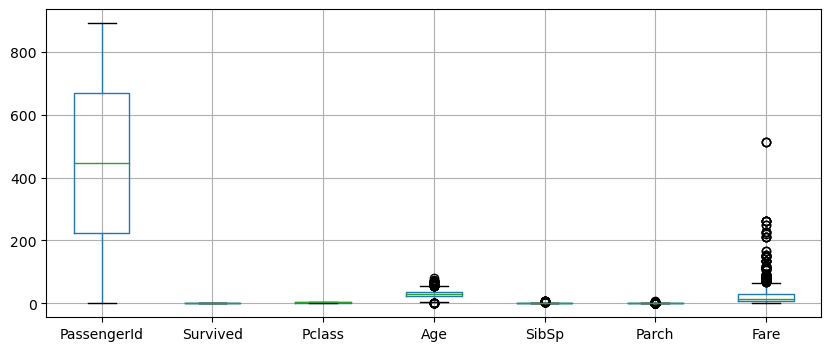

In [67]:
df.boxplot(figsize = (10,4))
plt.show()  # 이상치 확인

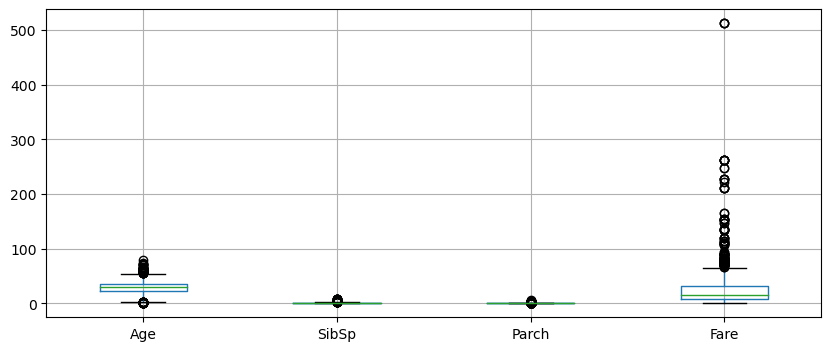

In [68]:
n_df = df[['Age','SibSp','Parch','Fare']]
n_df.boxplot(figsize = (10,4))
plt.show()

# 데이터 전처리

### Cabin, Embarked에 결측값 존재 -> 평균값 또는 최빈값으로 대체

In [69]:
print(df['Cabin'].value_counts())
print(df['Embarked'].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [70]:
df["Cabin"].fillna("etc", inplace = True)
df["Embarked"].fillna("S", inplace = True)

In [71]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,etc,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,etc,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,etc,S


In [73]:
# 객실번호는 첫자리만 별도의 변수로 생성.

df["Cabin"] = df['Cabin'].str.get(i=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,e,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,e,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,e,S


In [74]:
# 나이에 대한 파생변수 생성.

bins = [0, 14, 28, 45, 56, float('inf')]
labels = ['Child', 'Young', 'Middle', 'Prime', 'Old']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [75]:
# 가족수 계산.

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,e,S,Young,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,e,S,Young,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,e,S,Middle,1


In [80]:
# 요금 구간화

bins = [0, 50, 100, 150, 200, float('inf')]
labels = [0, 1, 2, 3, 4]
df['Fare_Group'] = pd.cut(df['Fare'], bins=bins, labels=labels)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,FamilySize,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,e,S,Young,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,e,S,Young,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,e,S,Middle,1,0


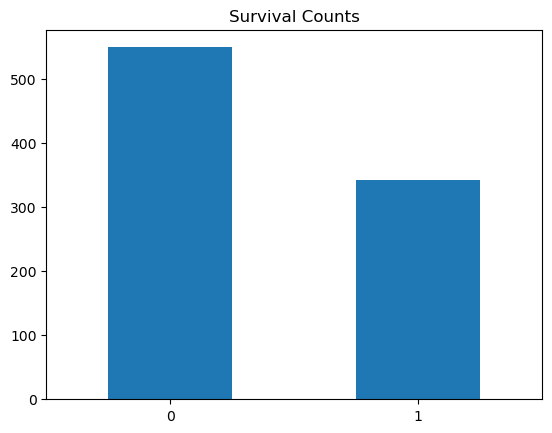

In [116]:
# 목표변수의 빈도수 현황 확인

df_count = df["Survived"].value_counts()
df_count.plot.bar(x='Survived', rot=0)
plt.title('Survival Counts')
plt.show()

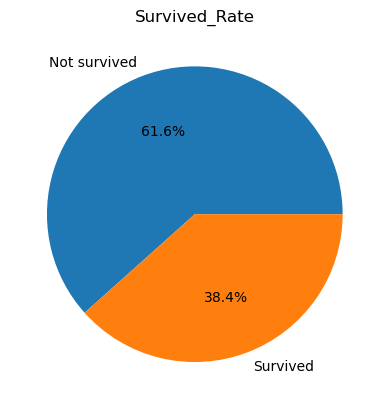

In [122]:
# 목표변수의 비율 확인

survived_counts = df['Survived'].value_counts()
labels = ['Not survived', 'Survived']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title('Survived_Rate')
plt.show()

### 성별에 대한 비율 확인

남자보다 여자의 생존 비율이 더 높은것을 확인할 수 있다

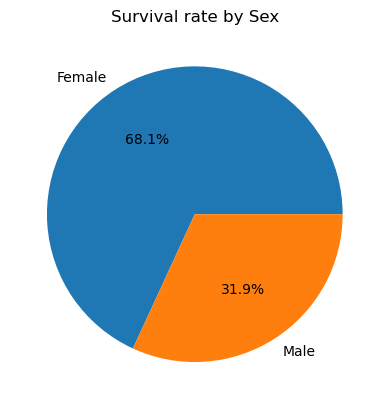

In [127]:
sex_survived_df = df[['Sex', 'Survived']]

sex_grouped = sex_survived_df.groupby('Sex')
survived_count = sex_grouped.sum()['Survived']

labels = ['Female', 'Male']
plt.pie(survived_count, labels=labels, autopct='%.1f%%')
plt.title('Survival rate by Sex')
plt.show()


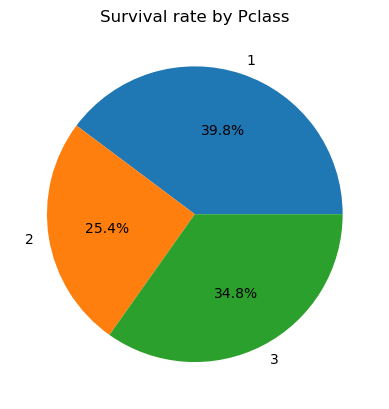

In [128]:
pclass_survived_df = df[['Pclass', 'Survived']]

pclass_grouped = pclass_survived_df.groupby('Pclass')
pclass_survived_count = pclass_grouped.sum()

plt.pie(pclass_survived_count['Survived'], labels=pclass_survived_count.index, autopct='%.1f%%')
plt.title('Survival rate by Pclass')
plt.show()

#### 탑승지에 대한 생존 비율 확인을 해본 결과 1등급에서의 생존율이 제일 높았다.

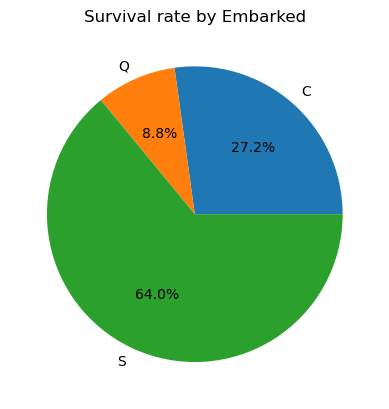

In [132]:
embarked_survived_df = df[['Embarked', 'Survived']]
embarked_grouped = embarked_survived_df.groupby('Embarked')
embarked_survived_count = embarked_grouped.sum()

plt.pie(embarked_survived_count['Survived'], labels=embarked_survived_count.index, autopct='%.1f%%')
plt.title('Survival rate by Embarked')
plt.show()

##### 탑승한곳의 경우 Southampton이 생존율이 제일 높았다.

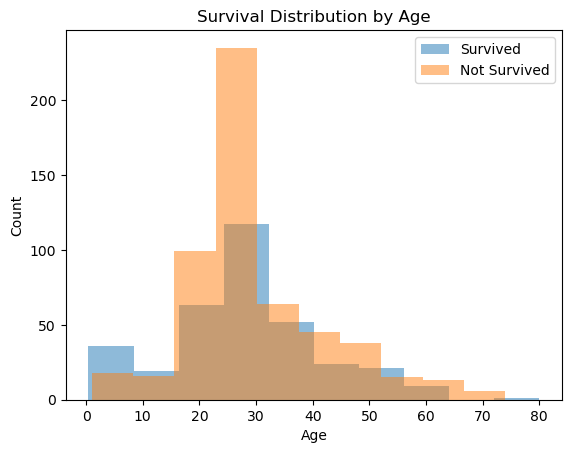

In [131]:
survived_age = df[df['Survived']==1]['Age']
not_survived_age = df[df['Survived']==0]['Age']

plt.hist(survived_age, alpha=0.5, label='Survived')
plt.hist(not_survived_age, alpha=0.5, label='Not Survived')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival Distribution by Age')
plt.show()

#### 위 그래프(나이에 대한 생존 비율 확인)를 보면 20~30대의 생존율이 가장 좋지 않았음을 알 수 있다.

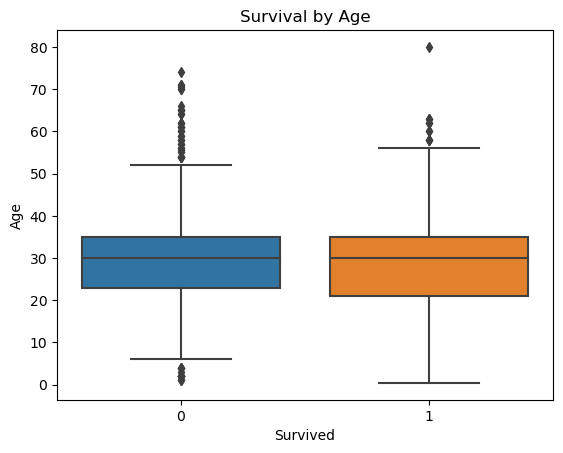

In [134]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.show()